In [573]:
import pandas as pd

**Reading the datasets of 3 restaurants web scraped from Zomato.**

In [574]:
data1 = pd.read_csv('/content/Restaurant 1.csv')
data2 = pd.read_csv('/content/Restaurant 2.csv')
data3 = pd.read_csv('/content/Restaurant 3.csv')

In [575]:
data1.head()

,Unnamed: 0,Restaurant Name,Restaurant Area,Item name,Item price,Rating,No of Rating,Item description,Bestseller tag
0,0,Andhra Gunpowder,"Brigade Road, Bangalore",Hyderabadi Chicken Dum Biryani,₹279,star-fillstar-fillstar-fillstar-fill,160 votes,This blockbuster biryani is slow cooked on cha...,NaN
1,1,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Veg Meals 2 [For 2 Persons],₹389,star-fillstar-fillstar-fillstar-fill,111 votes,"Steamed Rice, Pappu, Veggie Sambar, Tomato Pep...",MUST TRY
2,2,Andhra Gunpowder,"Brigade Road, Bangalore",Spinach Pappu Rice Bowl with Onion Pakoda and ...,₹179,star-fillstar-fillstar-fillstar-fill,60 votes,"Steamed Rice, Spinach Pappu, Onion Pakoda and ...",NaN
3,3,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-veg Meals 2 [For 2 Persons],₹499,star-fillstar-fillstar-fillstar-fill,66 votes,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",NaN
4,4,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-Veg Meals 1 [For 1 Person],₹299,star-fillstar-fillstar-fillstar-fill,148 votes,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",MUST TRY


In [576]:
data2.head()

,Unnamed: 0,Restaurant Name,Restaurant Area,Item name,Item price,Rating,No of Rating,Item description,Bestseller tag
0,0,UBQ By Barbeque Nation,"Indiranagar, Bangalore",Meals in a Box (Non Veg),₹719,star-fillstar-fillstar-fillstar-fill,10 votes,[Two Starters] \r\n-Kalmi Murgh Tikka (6Pcs) \...,MUST TRY
1,1,UBQ By Barbeque Nation,"Indiranagar, Bangalore\t",Chilli Chicken Fried Rice Bowl,₹219,star-fillstar-fillstar-fillstar-fill,22 votes,Succulent chicken pieces coated in a thick spi...,NaN
2,2,UBQ By Barbeque Nation,"Indiranagar, Bangalore\t",Butter Chicken Bowl,₹209,star-fillstar-fillstar-fillstar-fill,7 votes,Succulent boneless Chicken cooked in an irresi...,NaN
3,3,UBQ By Barbeque Nation,"Indiranagar, Bangalore\t",BBQ Chicken Wings,₹269,star-fillstar-fillstar-fillstar-fill,9 votes,Nothing better than a crispy yet juicy hot chi...,NaN
4,4,UBQ By Barbeque Nation,"Indiranagar, Bangalore\t",Veg Fried Rice,₹189,star-fillstar-fillstar-fillstar-fill,9 votes,Vegetables stir-fried rice.,NaN


In [577]:
data3.head()

,Unnamed: 0,Restaurant Name,Restaurant Area,Item name,Item price,Rating,No of Rating,Item description,Bestseller tag
0,0,BOX8 - Desi Meals,"Indiranagar, Bangalore",Dilli Wale Rajma Rice Bowl,₹168,star-fillstar-fillstar-fillstar-fill,40 votes,Really good Rajma served with Rice + Salad + M...,MUST TRY
1,1,BOX8 - Desi Meals,"Indiranagar,Bangalore",Amritsari Chole Thali Meal,₹198,star-fillstar-fillstar-fillstar-fill,215 votes,Amritsari chole + Dal Makhni/Chole/Dilli Rajma...,NaN
2,2,BOX8 - Desi Meals,"Indiranagar,Bangalore",Tandoori Chicken Fiery Wings [6 Pcs],₹168,star-fillstar-fillstar-fillstar-fill,64 votes,Our love for chicken wings & everything tandoo...,MUST TRY
3,3,BOX8 - Desi Meals,"Indiranagar,Bangalore",Butter Chicken Thali Meal,₹288,star-fillstar-fillstar-fillstar-fill,69 votes,Seriously delicious Butter Chicken + Dal Makhn...,MUST TRY
4,4,BOX8 - Desi Meals,"Indiranagar,Bangalore",Amritsari Chole Rice Bowl,₹168,star-fillstar-fillstar-fillstar-fill,20 votes,Authentic Amritsari chole with Rice + Salad + ...,NaN


In [578]:
data1.shape

(84, 9)

In [579]:
data2.shape

(101, 9)

In [580]:
data3.shape

(350, 9)

In [581]:
data1.isnull().sum(axis = 0)

Unnamed: 0           0
Restaurant Name      0
Restaurant Area      0
Item name            0
Item price           0
Rating               7
No of Rating         7
Item description     7
Bestseller tag      74
dtype: int64

In [582]:
data2.isnull().sum(axis = 0)

Unnamed: 0           0
Restaurant Name      0
Restaurant Area      0
Item name            0
Item price           0
Rating              14
No of Rating        14
Item description     3
Bestseller tag      95
dtype: int64

In [583]:
data3.isnull().sum(axis = 0)

Unnamed: 0            0
Restaurant Name       0
Restaurant Area       0
Item name             0
Item price            0
Rating               18
No of Rating         18
Item description      0
Bestseller tag      330
dtype: int64

**Merging all the csv files to create a single file.**

In [584]:
df = pd.concat(
    map(pd.read_csv, ['/content/Restaurant 1.csv','/content/Restaurant 2.csv','/content/Restaurant 3.csv']), ignore_index=True)

In [585]:
df.head()

,Unnamed: 0,Restaurant Name,Restaurant Area,Item name,Item price,Rating,No of Rating,Item description,Bestseller tag
0,0,Andhra Gunpowder,"Brigade Road, Bangalore",Hyderabadi Chicken Dum Biryani,₹279,star-fillstar-fillstar-fillstar-fill,160 votes,This blockbuster biryani is slow cooked on cha...,NaN
1,1,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Veg Meals 2 [For 2 Persons],₹389,star-fillstar-fillstar-fillstar-fill,111 votes,"Steamed Rice, Pappu, Veggie Sambar, Tomato Pep...",MUST TRY
2,2,Andhra Gunpowder,"Brigade Road, Bangalore",Spinach Pappu Rice Bowl with Onion Pakoda and ...,₹179,star-fillstar-fillstar-fillstar-fill,60 votes,"Steamed Rice, Spinach Pappu, Onion Pakoda and ...",NaN
3,3,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-veg Meals 2 [For 2 Persons],₹499,star-fillstar-fillstar-fillstar-fill,66 votes,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",NaN
4,4,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-Veg Meals 1 [For 1 Person],₹299,star-fillstar-fillstar-fillstar-fill,148 votes,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",MUST TRY


In [586]:
df.shape

(535, 9)

**Total number of missing values in each column.**

In [587]:
df.isnull().sum(axis = 0)

Unnamed: 0            0
Restaurant Name       0
Restaurant Area       0
Item name             0
Item price            0
Rating               39
No of Rating         39
Item description     10
Bestseller tag      499
dtype: int64

In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        535 non-null    int64 
 1   Restaurant Name   535 non-null    object
 2   Restaurant Area   535 non-null    object
 3   Item name         535 non-null    object
 4   Item price        535 non-null    object
 5   Rating            496 non-null    object
 6   No of Rating      496 non-null    object
 7   Item description  525 non-null    object
 8   Bestseller tag    36 non-null     object
dtypes: int64(1), object(8)
memory usage: 37.7+ KB


In [589]:
import numpy as np

In [590]:
df['Item description']= np.where(df['Item description'].isnull(), df['Item name'], df['Item description'])

In [591]:
df.isnull().sum(axis = 0)

Unnamed: 0            0
Restaurant Name       0
Restaurant Area       0
Item name             0
Item price            0
Rating               39
No of Rating         39
Item description      0
Bestseller tag      499
dtype: int64

In [592]:
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(df['Bestseller tag'])):
    
    if df['Bestseller tag'][i] not in visited: 
        
        visited.append(df['Bestseller tag'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)

No.of.unique values : 2
unique values : [nan, 'MUST TRY']


**Replacing the nan values in the Bestseller tag with 0 and 'Must try' tags with 1.**

In [593]:
df['Bestseller tag'] = df['Bestseller tag'].fillna(0)

In [594]:
df['Bestseller tag'] = df['Bestseller tag'].replace(['MUST TRY'],'1')

In [595]:
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(df['Bestseller tag'])):
    
    if df['Bestseller tag'][i] not in visited: 
        
        visited.append(df['Bestseller tag'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)

No.of.unique values : 2
unique values : [0, '1']


In [596]:
cnt2 = 0
  
# list to hold visited values
visited2 = []
  
# loop for counting the unique
# values in height
for i in range(0, len(df['Rating'])):
    
    if df['Rating'][i] not in visited2: 
        
        visited2.append(df['Rating'][i])
          
        cnt2 += 1
  
print("No.of.unique values :",
      cnt2)
  
print("unique values :",
      visited2)

No.of.unique values : 3
unique values : ['star-fillstar-fillstar-fillstar-fill', 'star-fillstar-fillstar-fillstar-fillstar-fill', nan]


In [597]:
df.head()

,Unnamed: 0,Restaurant Name,Restaurant Area,Item name,Item price,Rating,No of Rating,Item description,Bestseller tag
0,0,Andhra Gunpowder,"Brigade Road, Bangalore",Hyderabadi Chicken Dum Biryani,₹279,star-fillstar-fillstar-fillstar-fill,160 votes,This blockbuster biryani is slow cooked on cha...,0
1,1,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Veg Meals 2 [For 2 Persons],₹389,star-fillstar-fillstar-fillstar-fill,111 votes,"Steamed Rice, Pappu, Veggie Sambar, Tomato Pep...",1
2,2,Andhra Gunpowder,"Brigade Road, Bangalore",Spinach Pappu Rice Bowl with Onion Pakoda and ...,₹179,star-fillstar-fillstar-fillstar-fill,60 votes,"Steamed Rice, Spinach Pappu, Onion Pakoda and ...",0
3,3,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-veg Meals 2 [For 2 Persons],₹499,star-fillstar-fillstar-fillstar-fill,66 votes,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",0
4,4,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-Veg Meals 1 [For 1 Person],₹299,star-fillstar-fillstar-fillstar-fill,148 votes,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",1


**Replacing the rating values with 0 (for nan values), 1 (for ratings lesser than 3.5) and 2 (for ratings greater than 3.5).**

In [598]:
df['Rating'] = df['Rating'].fillna(0)
df['Rating'] = df['Rating'].replace(['star-fillstar-fillstar-fillstar-fill'],'1')
df['Rating'] = df['Rating'].replace(['star-fillstar-fillstar-fillstar-fillstar-fill'],'2')

In [599]:
cnt2 = 0
  
# list to hold visited values
visited2 = []
  
# loop for counting the unique
# values in height
for i in range(0, len(df['Rating'])):
    
    if df['Rating'][i] not in visited2: 
        
        visited2.append(df['Rating'][i])
          
        cnt2 += 1
  
print("No.of.unique values :",
      cnt2)
  
print("unique values :",
      visited2)

No.of.unique values : 3
unique values : ['1', '2', 0]


In [600]:
df.head()

,Unnamed: 0,Restaurant Name,Restaurant Area,Item name,Item price,Rating,No of Rating,Item description,Bestseller tag
0,0,Andhra Gunpowder,"Brigade Road, Bangalore",Hyderabadi Chicken Dum Biryani,₹279,1,160 votes,This blockbuster biryani is slow cooked on cha...,0
1,1,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Veg Meals 2 [For 2 Persons],₹389,1,111 votes,"Steamed Rice, Pappu, Veggie Sambar, Tomato Pep...",1
2,2,Andhra Gunpowder,"Brigade Road, Bangalore",Spinach Pappu Rice Bowl with Onion Pakoda and ...,₹179,1,60 votes,"Steamed Rice, Spinach Pappu, Onion Pakoda and ...",0
3,3,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-veg Meals 2 [For 2 Persons],₹499,1,66 votes,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",0
4,4,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-Veg Meals 1 [For 1 Person],₹299,1,148 votes,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",1


In [601]:
df['Item price'] = df['Item price'].str.replace('[₹]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [602]:
df.head()

,Unnamed: 0,Restaurant Name,Restaurant Area,Item name,Item price,Rating,No of Rating,Item description,Bestseller tag
0,0,Andhra Gunpowder,"Brigade Road, Bangalore",Hyderabadi Chicken Dum Biryani,279,1,160 votes,This blockbuster biryani is slow cooked on cha...,0
1,1,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Veg Meals 2 [For 2 Persons],389,1,111 votes,"Steamed Rice, Pappu, Veggie Sambar, Tomato Pep...",1
2,2,Andhra Gunpowder,"Brigade Road, Bangalore",Spinach Pappu Rice Bowl with Onion Pakoda and ...,179,1,60 votes,"Steamed Rice, Spinach Pappu, Onion Pakoda and ...",0
3,3,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-veg Meals 2 [For 2 Persons],499,1,66 votes,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",0
4,4,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-Veg Meals 1 [For 1 Person],299,1,148 votes,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",1


In [603]:
df['No of Rating'] = df['No of Rating'].str.replace('[votes, vote]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [604]:
df.head()

,Unnamed: 0,Restaurant Name,Restaurant Area,Item name,Item price,Rating,No of Rating,Item description,Bestseller tag
0,0,Andhra Gunpowder,"Brigade Road, Bangalore",Hyderabadi Chicken Dum Biryani,279,1,160,This blockbuster biryani is slow cooked on cha...,0
1,1,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Veg Meals 2 [For 2 Persons],389,1,111,"Steamed Rice, Pappu, Veggie Sambar, Tomato Pep...",1
2,2,Andhra Gunpowder,"Brigade Road, Bangalore",Spinach Pappu Rice Bowl with Onion Pakoda and ...,179,1,60,"Steamed Rice, Spinach Pappu, Onion Pakoda and ...",0
3,3,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-veg Meals 2 [For 2 Persons],499,1,66,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",0
4,4,Andhra Gunpowder,"Brigade Road, Bangalore",Andhra Non-Veg Meals 1 [For 1 Person],299,1,148,"Steamed Rice, Pappu, Andhra Chicken Curry, Gun...",1


In [605]:
df.isnull().sum(axis = 0)

Unnamed: 0           0
Restaurant Name      0
Restaurant Area      0
Item name            0
Item price           0
Rating               0
No of Rating        39
Item description     0
Bestseller tag       0
dtype: int64

In [606]:
df['No of Rating'] = df['No of Rating'].fillna(0)

In [607]:
df.isnull().sum(axis = 0)

Unnamed: 0          0
Restaurant Name     0
Restaurant Area     0
Item name           0
Item price          0
Rating              0
No of Rating        0
Item description    0
Bestseller tag      0
dtype: int64

In [608]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [609]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
lemma = WordNetLemmatizer()
corpus = []
for i in range (len(df)):
    review = re.sub('[^a-zA-Z]', ' ', str(df['Item name'][i]))
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [610]:
corpus[4]

'andhra non veg meal person'

In [611]:
corpus2 = []
for i in range (len(df)):
    review = re.sub('[^a-zA-Z]', ' ', str(df['Item description'][i]))
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus2.append(review)

In [612]:
corpus2[4]

'steamed rice pappu andhra chicken curry guntur chicken fry veggie sambar tomato pepper read'

In [613]:
df['Item name'] = pd.DataFrame(corpus,columns =['Item name'])
df['Item description'] = pd.DataFrame(corpus2,columns =['Item description'])

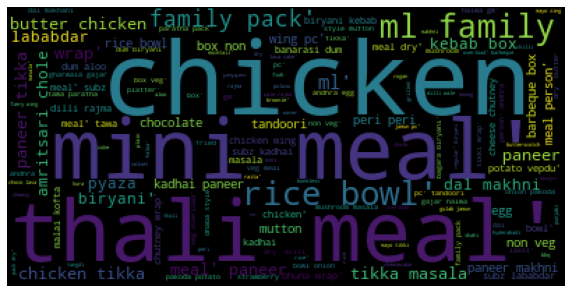

In [614]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df['Item name'].values 

wordcloud = WordCloud().generate(str(text))

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

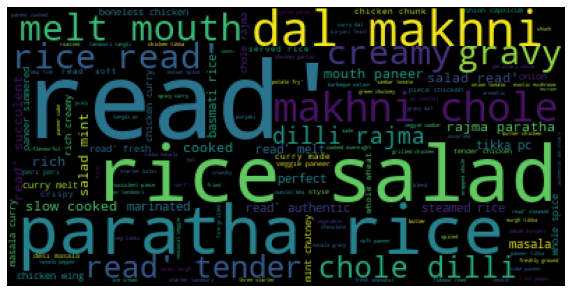

In [615]:
text2 = df['Item description'].values
wordcloud2 = WordCloud().generate(str(text2))

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


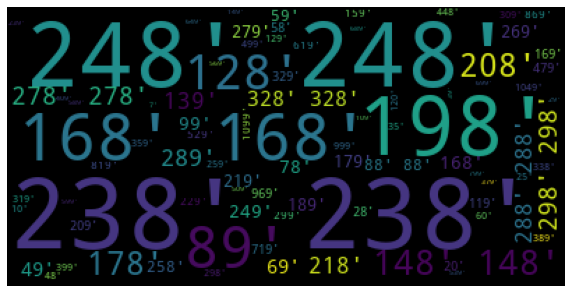

In [616]:
text3 = df['Item price'].values
wordcloud3 = WordCloud().generate(str(text3))

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [617]:
df['Rating']=df['Rating'].astype(float)
df['No of Rating']=df['No of Rating'].astype(float)
df['Item price']=df['Item price'].astype(float)
df['Bestseller tag']=df['Bestseller tag'].astype(float)

Text(0.5, 0, 'Ratings')

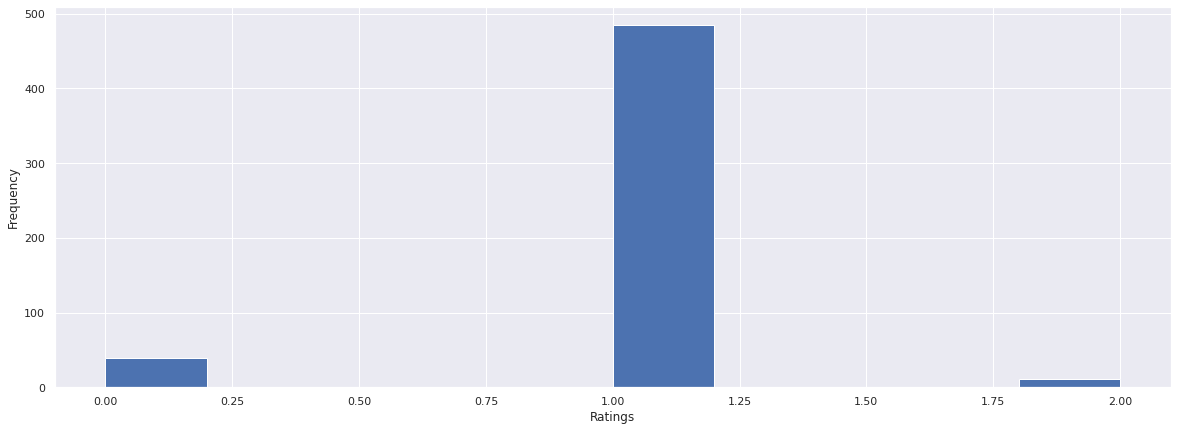

In [618]:
df['Rating'].plot(kind='hist')
plt.xlabel("Ratings")

Text(0.5, 0, 'No of Ratings')

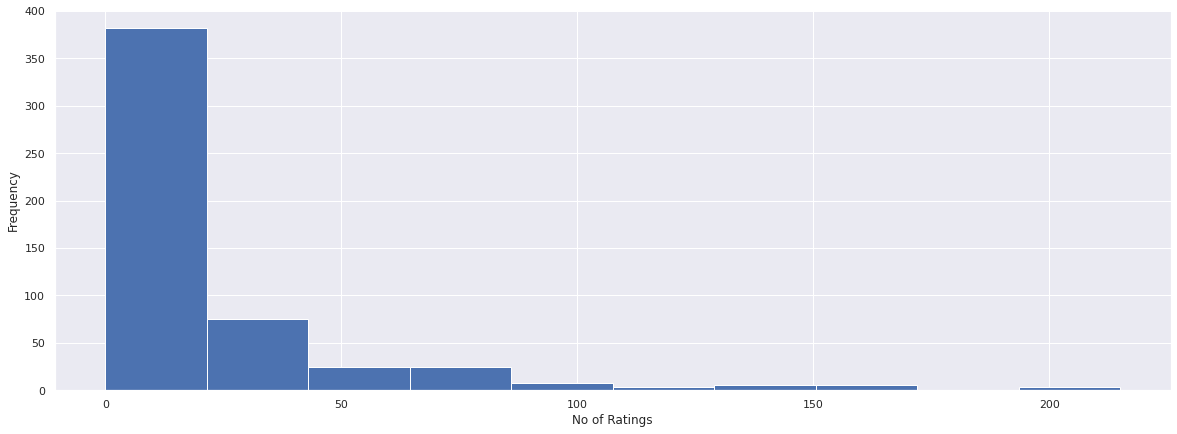

In [619]:
df['No of Rating'].plot(kind='hist')
plt.xlabel("No of Ratings")

Text(0.5, 0, 'Prices of items')

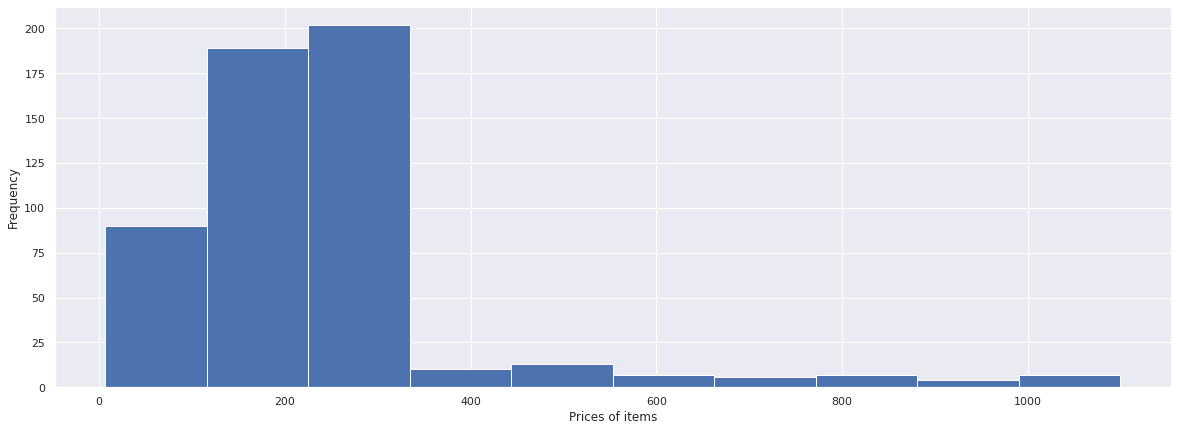

In [620]:
df['Item price'].plot(kind='hist')
plt.xlabel('Prices of items')

Text(0.5, 0, 'Bestseller items')

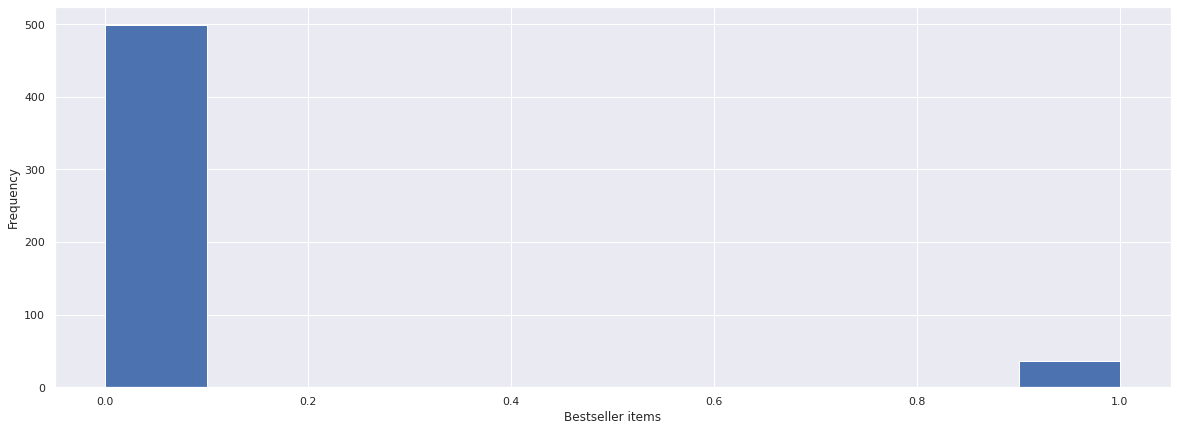

In [621]:
df['Bestseller tag'].plot(kind='hist')
plt.xlabel('Bestseller items')

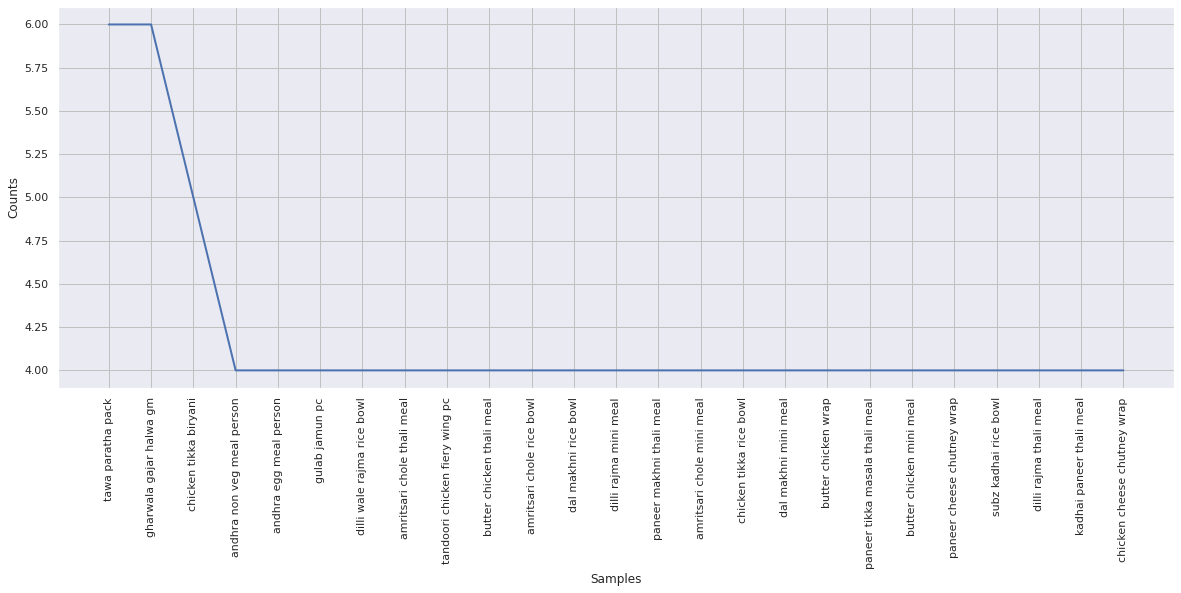

In [622]:
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(20,7)})
item_name_words = nltk.FreqDist(corpus)
item_name_words.plot(25)

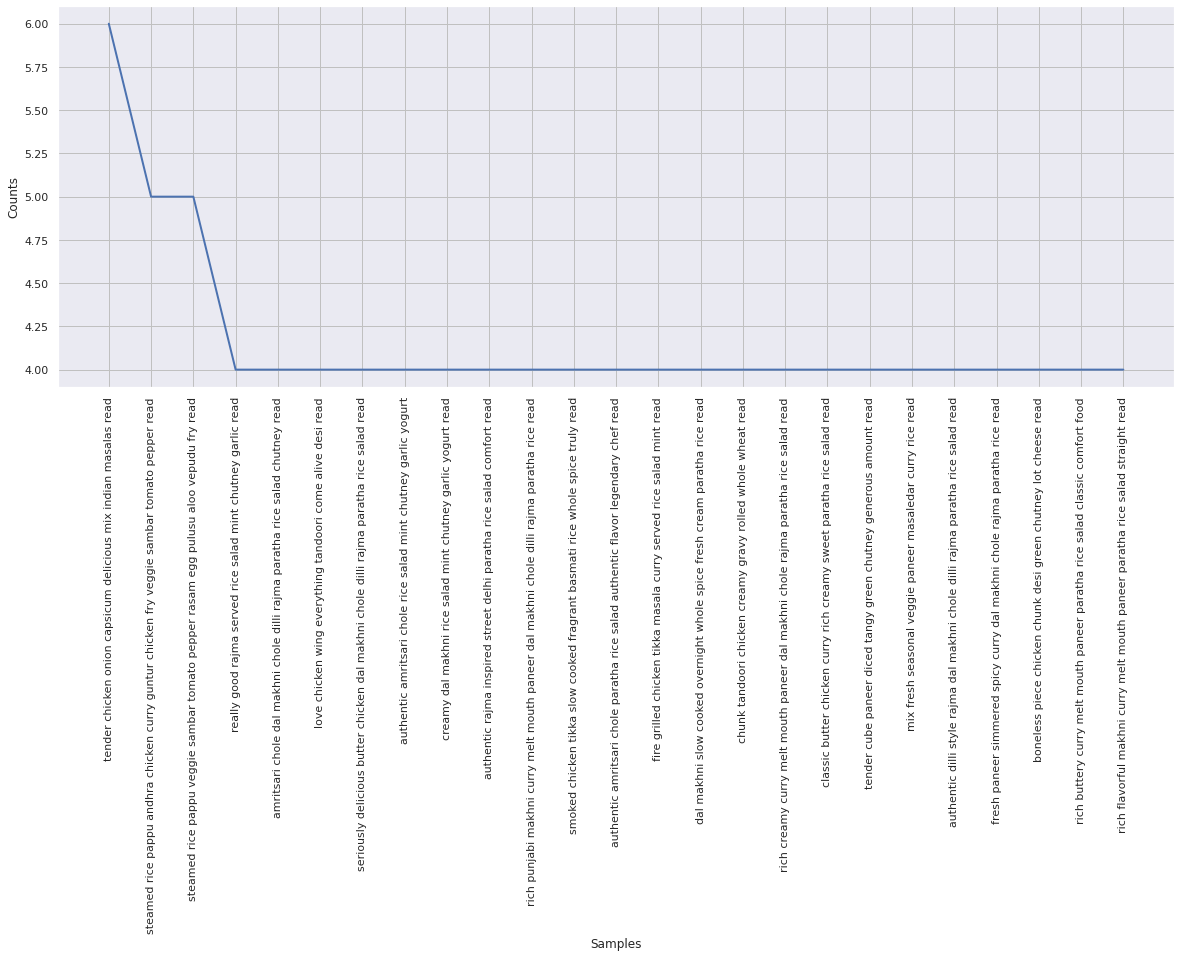

In [623]:
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(20,7)})
item_desc_words = nltk.FreqDist(corpus2)
item_desc_words.plot(25)